In [15]:
import nidaqmx
from nidaqmx.constants import AcquisitionType, Edge
import numpy as np
import matplotlib.pyplot as plt

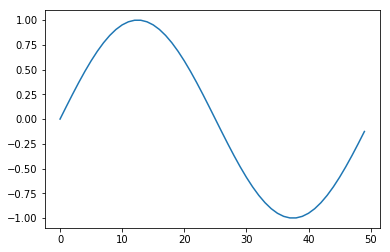

In [16]:
n_samples = 50
v_ar = [np.sin(2*np.pi*i/n_samples) for i in range(n_samples)]

plt.plot(v_ar)
plt.show()

### Without "with-as"

In [33]:
task = nidaqmx.Task()
task.ao_channels.add_ao_voltage_chan('/PXI-6363/ao0')

task.timing.cfg_samp_clk_timing(
    rate=50,
#     source='/PXI-6363/PFI12',
#     active_edge=Edge.RISING,
    sample_mode=AcquisitionType.CONTINUOUS,
    samps_per_chan=n_samples
)

print(task.write(v_ar))
task.start()

50


In [34]:
task.stop()
task.close()

### "with-as"

In [50]:
with nidaqmx.Task() as task:
    task.ao_channels.add_ao_voltage_chan('/PXI-6363/ao0')
    
    task.timing.cfg_samp_clk_timing(
        rate=1000,
        source='/PXI-6363/PFI12',
        active_edge=Edge.RISING,
        sample_mode=AcquisitionType.CONTINUOUS,
        samps_per_chan=n_samples
    )
        
    print(task.write(v_ar))
    task.start()
    task.wait_until_done(20)

5


DaqError: Wait Until Done did not indicate that the task was done within the specified timeout.

Increase the timeout, check the program, and make sure connections for external timing and triggering are in place.
Task Name: _unnamedTask<2B>

Status Code: -200560

In [14]:
with nidaqmx.Task() as task:
    task.ao_channels.add_ao_voltage_chan('/PXI-6363/ao0')
    
    print(task.write(0))

1
